### Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns

### Load data and split list 

In [2]:
train_data = os.listdir('./train/train/')
test_data = os.listdir('./test/')

In [3]:
data_time_series = []
for data_path in train_data:
    if "data_time_series" in data_path:
        data_time_series.append(data_path)
        
data_time_stamps = []
for data_path in train_data:
    if "data_time_stamps" in data_path:
        data_time_stamps.append(data_path)

label_time_series = []
for data_path in train_data:
    if "label_time_series" in data_path:
        label_time_series.append(data_path)

label_time_stamps = []
for data_path in train_data:
    if "label_time_stamps" in data_path:
        label_time_stamps.append(data_path)

### Plot all channel data_time_series

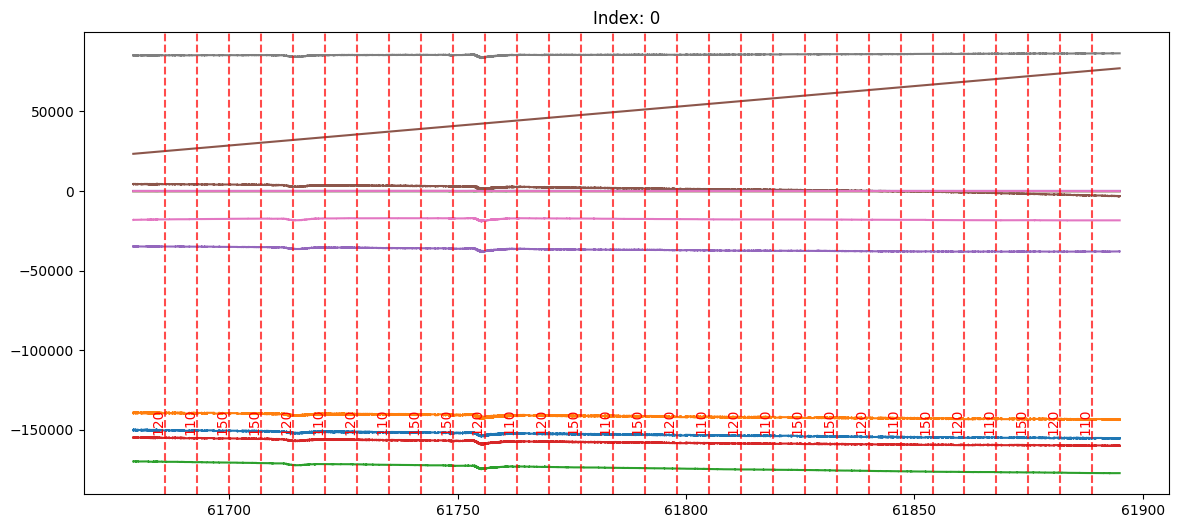

In [4]:
plt.figure(figsize=(14,6))  # You can adjust the size as per your need
for idx, data_path in enumerate(data_time_series[:1]):
    data = np.load('./train/train/'+data_path)
    time = np.load('./train/train/'+data_time_stamps[idx])
    plt.subplot(1,1,idx+1,)
    plt.plot(time,data)
    plt.title(f"Index: {idx}")

    label_time = np.load('./train/train/'+label_time_stamps[idx])
    label = np.load('./train/train/'+label_time_series[idx])

    for i in range(len(label_time)):
        plt.axvline(x=label_time[i], color='r', linestyle='--', alpha=0.7)
        plt.text(label_time[i], np.mean(data[:, 0]), str(label[i, 0]), 
                color='r', verticalalignment='bottom', horizontalalignment='right', rotation=90)
plt.show()

### Plot each channel (0-7)

In [5]:
block_num = 1

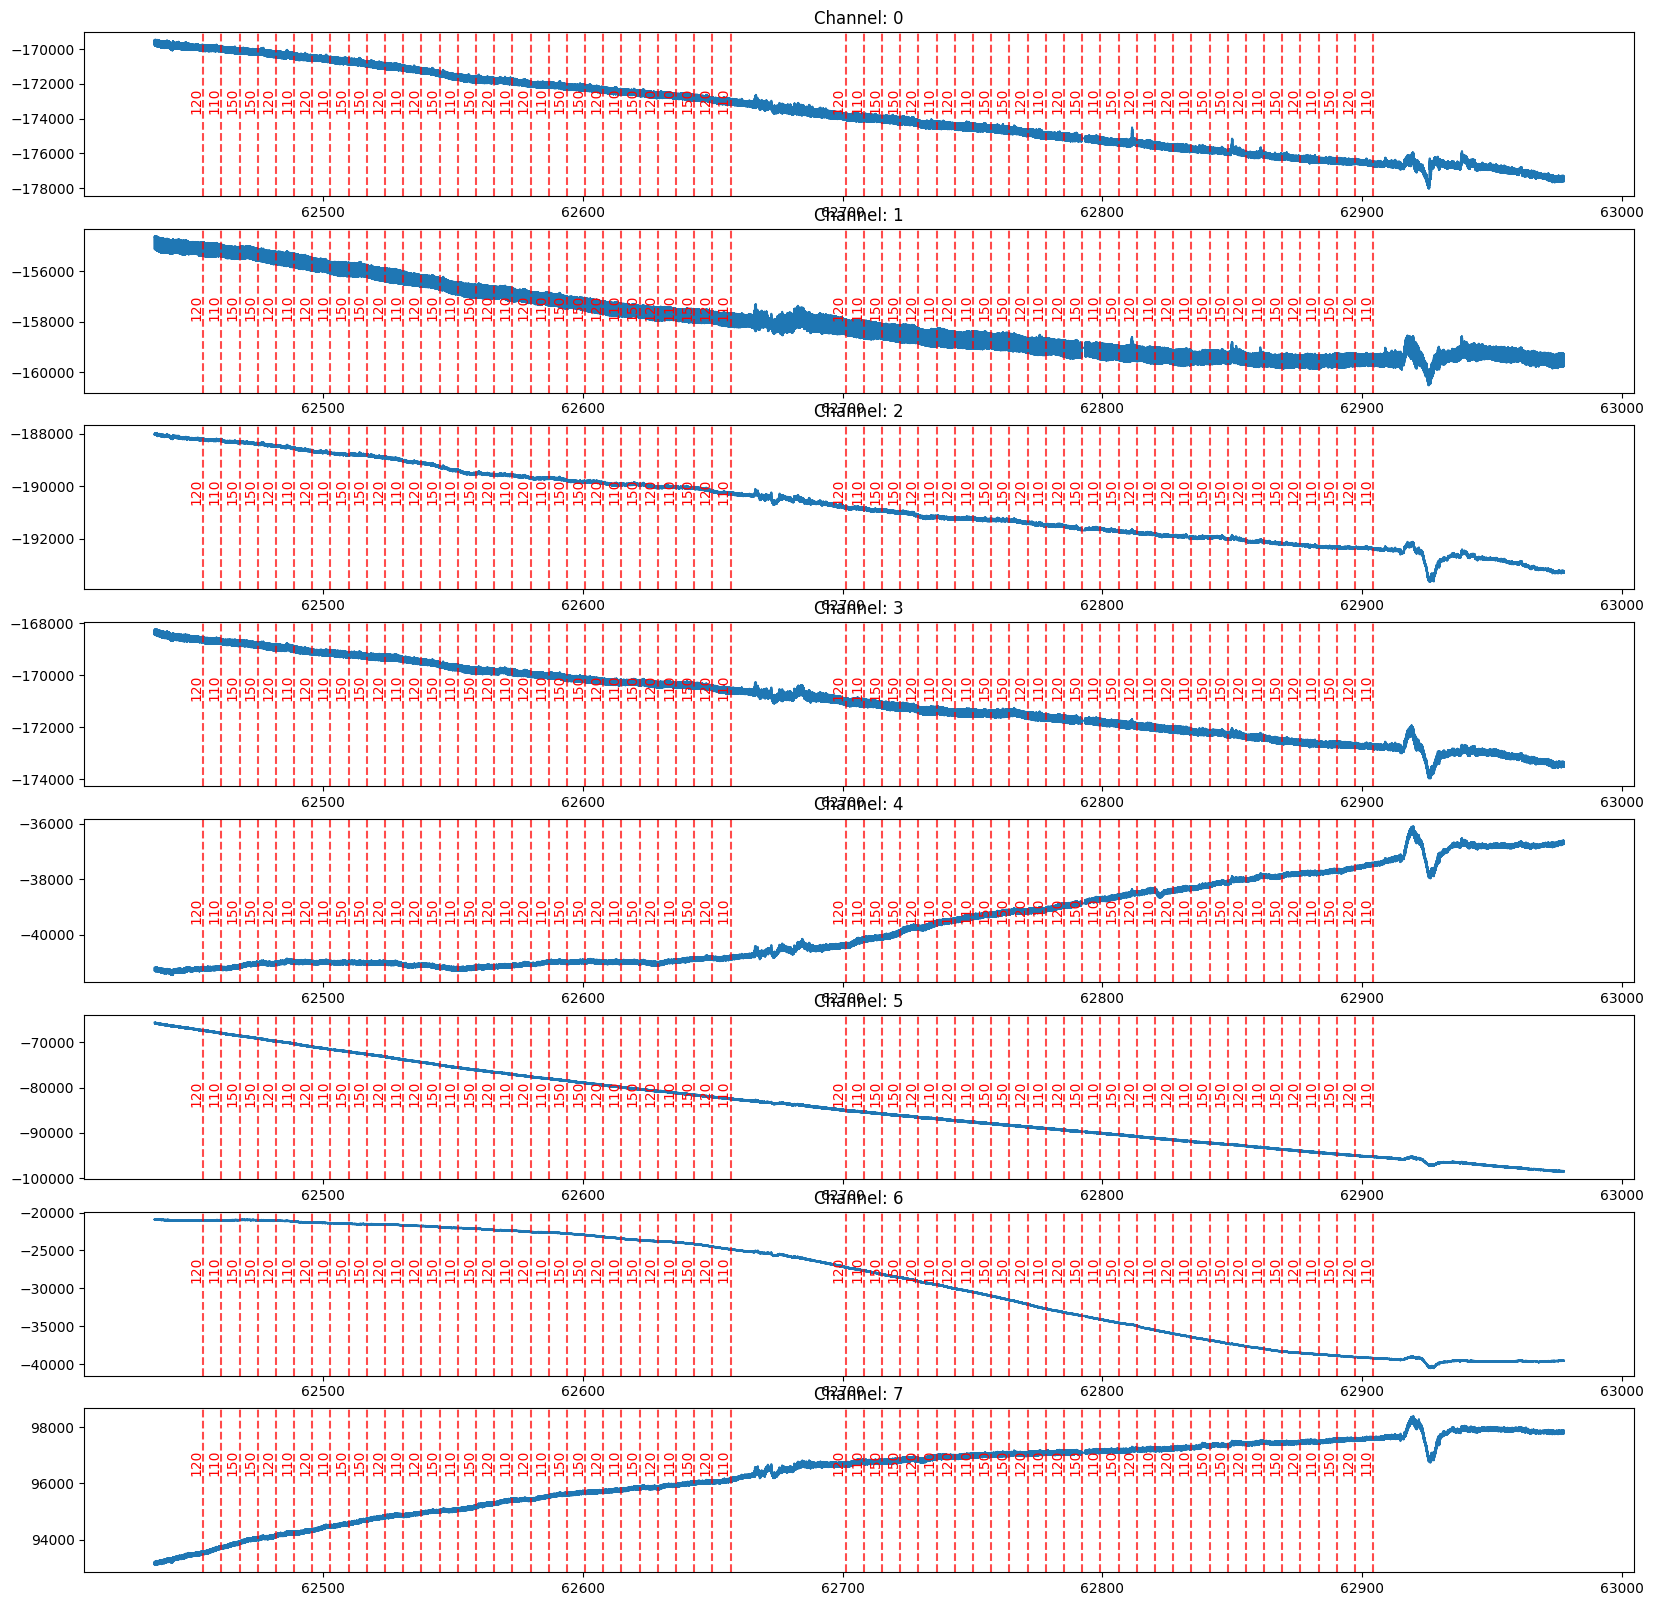

In [6]:
data = np.load('./train/train/'+data_time_series[block_num])
time = np.load('./train/train/'+data_time_stamps[block_num])
label_time = np.load('./train/train/'+label_time_stamps[block_num])
label = np.load('./train/train/'+label_time_series[block_num])
plt.figure(figsize=(20,20))  # You can adjust the size as per your need
for i in range(8):
    plt.subplot(8,1,i+1,)
    plt.plot(time,data[:,i])
    plt.title(f"Channel: {i}")
    for j in range(len(label_time)):
        plt.axvline(x=label_time[j], color='r', linestyle='--', alpha=0.7)
        plt.text(label_time[j], np.mean(data[:, i]), str(label[j, 0]),  # Use mean of current subplot's data
                color='r', verticalalignment='bottom', horizontalalignment='right', rotation=90)
plt.show()

### Plot each channel (8-16)

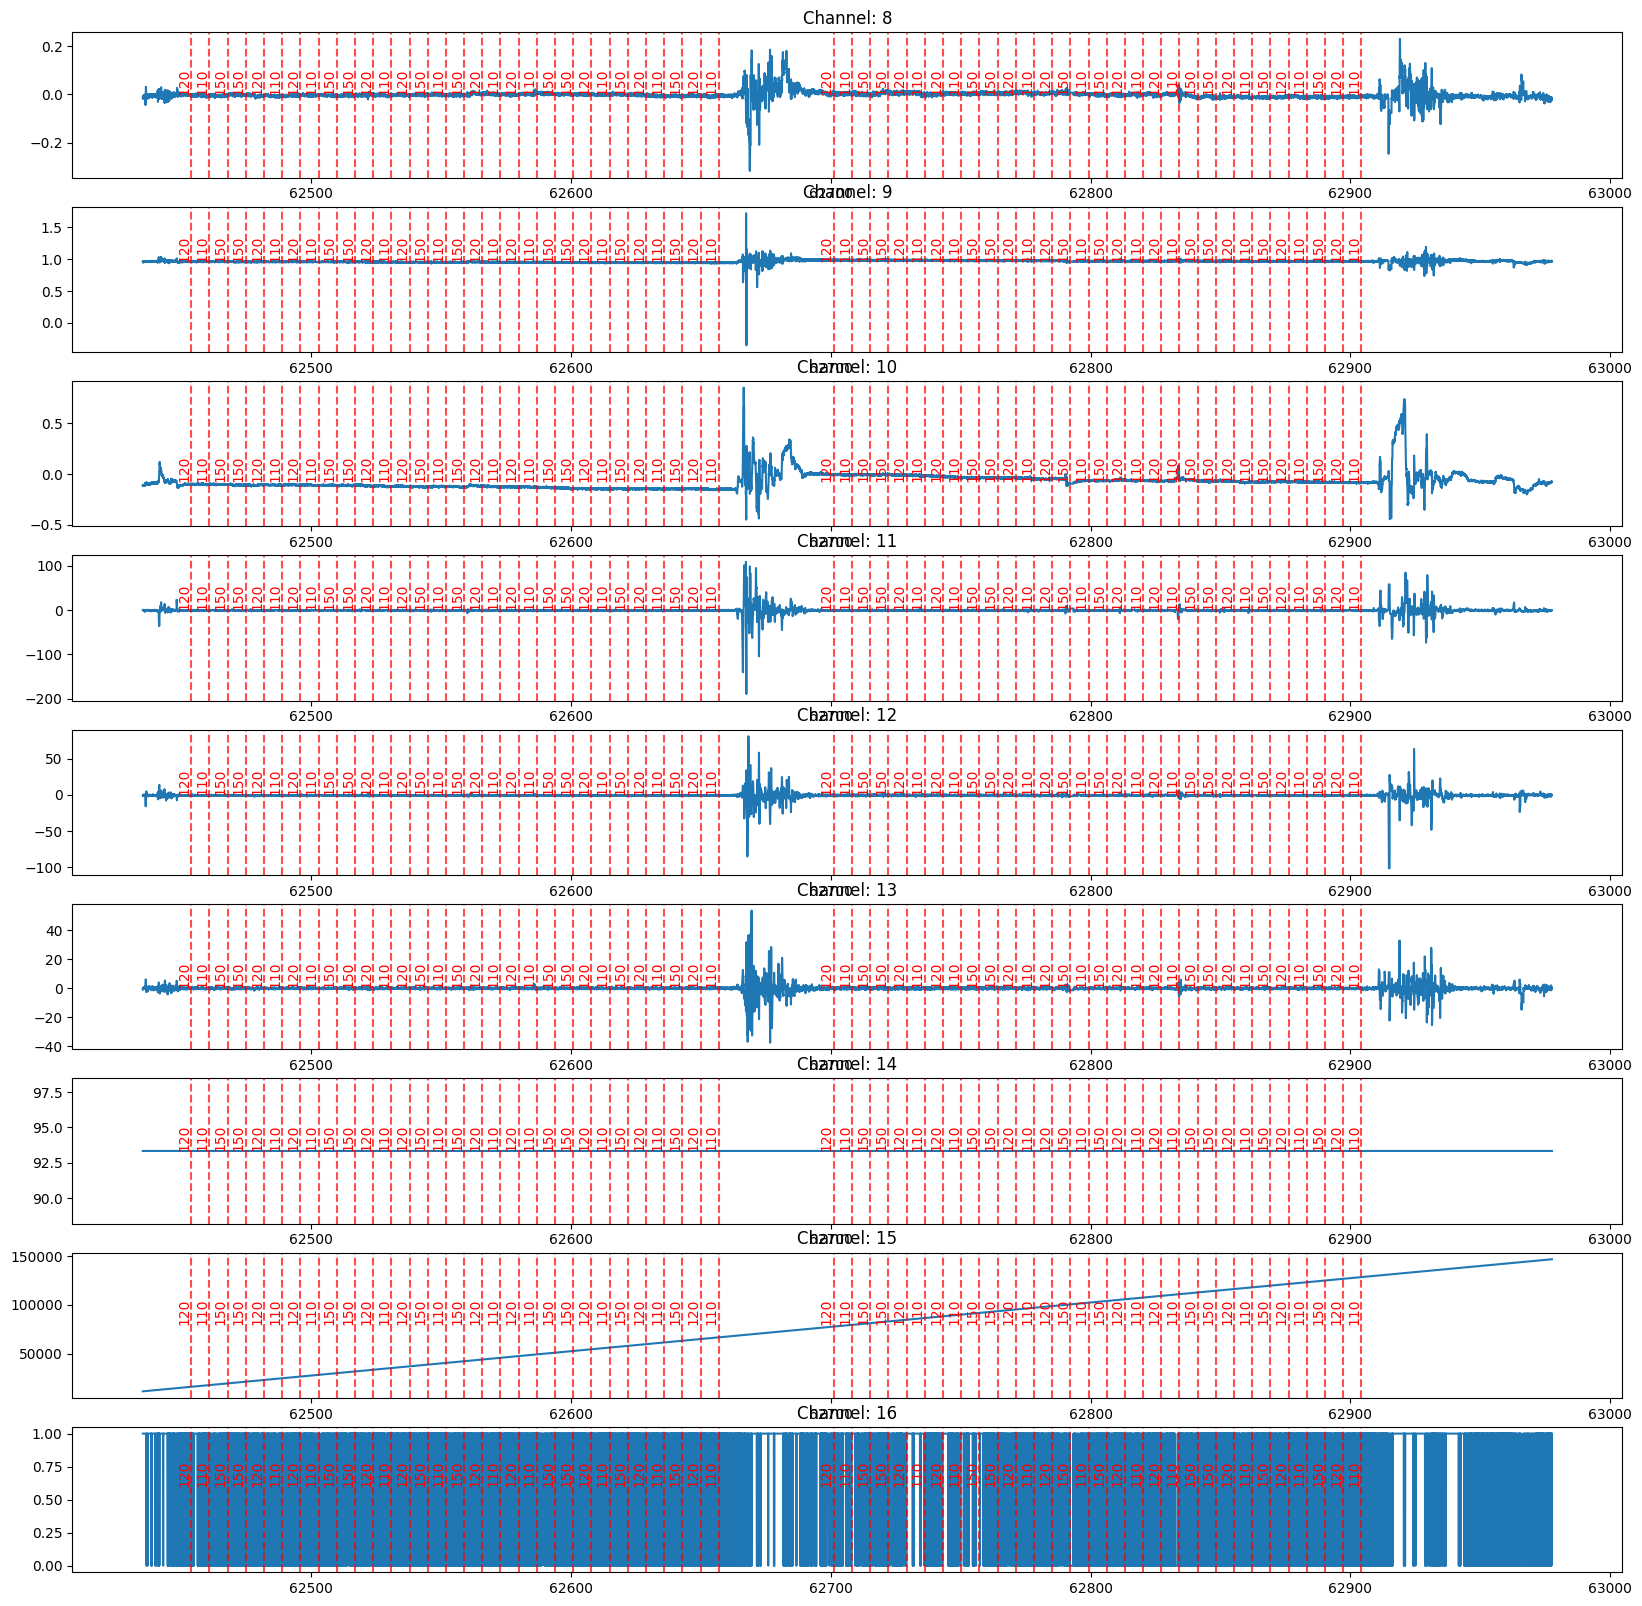

In [7]:
data = np.load('./train/train/'+data_time_series[block_num])
time = np.load('./train/train/'+data_time_stamps[block_num])
label_time = np.load('./train/train/'+label_time_stamps[block_num])
label = np.load('./train/train/'+label_time_series[block_num])
plt.figure(figsize=(20,20))  # You can adjust the size as per your need
for i in range(9):
    plt.subplot(9,1,i+1,)
    plt.plot(time,data[:,i+8])
    plt.title(f"Channel: {i+8}")
    for j in range(len(label_time)):
        plt.axvline(x=label_time[j], color='r', linestyle='--', alpha=0.7)
        plt.text(label_time[j], np.mean(data[:, i+8]), str(label[j, 0]),  # Use mean of current subplot's data
                color='r', verticalalignment='bottom', horizontalalignment='right', rotation=90)
plt.show()

In [8]:
num = 1

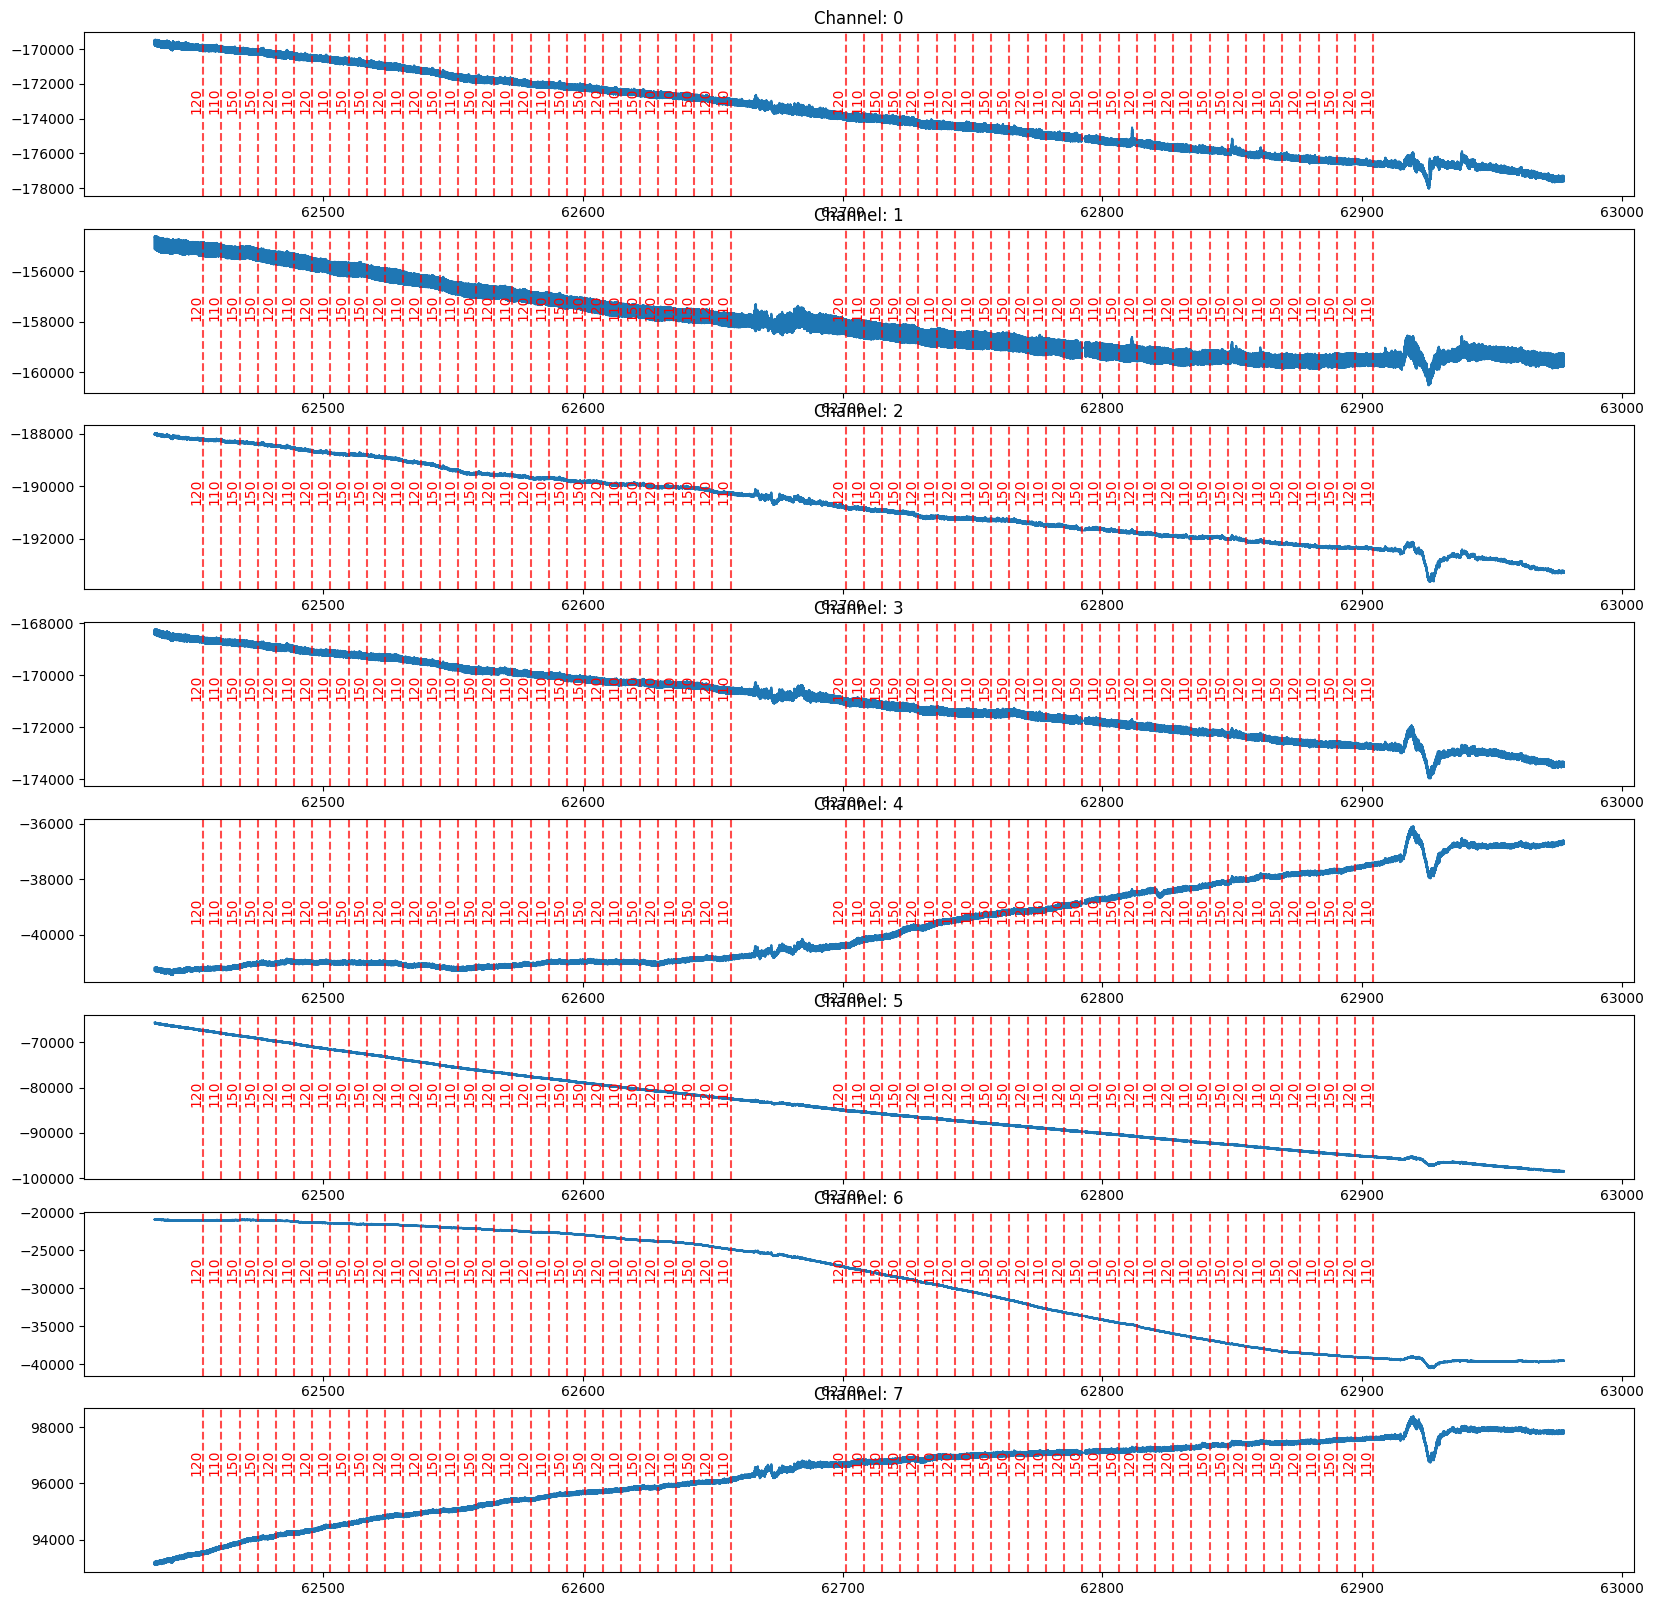

In [9]:
data = np.load('./train/train/'+data_time_series[num])
time = np.load('./train/train/'+data_time_stamps[num])
label_time = np.load('./train/train/'+label_time_stamps[num])
label = np.load('./train/train/'+label_time_series[num])
plt.figure(figsize=(20,20))  # You can adjust the size as per your need
for i in range(8):
    plt.subplot(8,1,i+1,)
    plt.plot(time,data[:,i])
    plt.title(f"Channel: {i}")
    for j in range(len(label_time)):
        plt.axvline(x=label_time[j], color='r', linestyle='--', alpha=0.7)
        plt.text(label_time[j], np.mean(data[:, i]), str(label[j, 0]),  # Use mean of current subplot's data
                color='r', verticalalignment='bottom', horizontalalignment='right', rotation=90)
plt.show()

### Plot only one channel

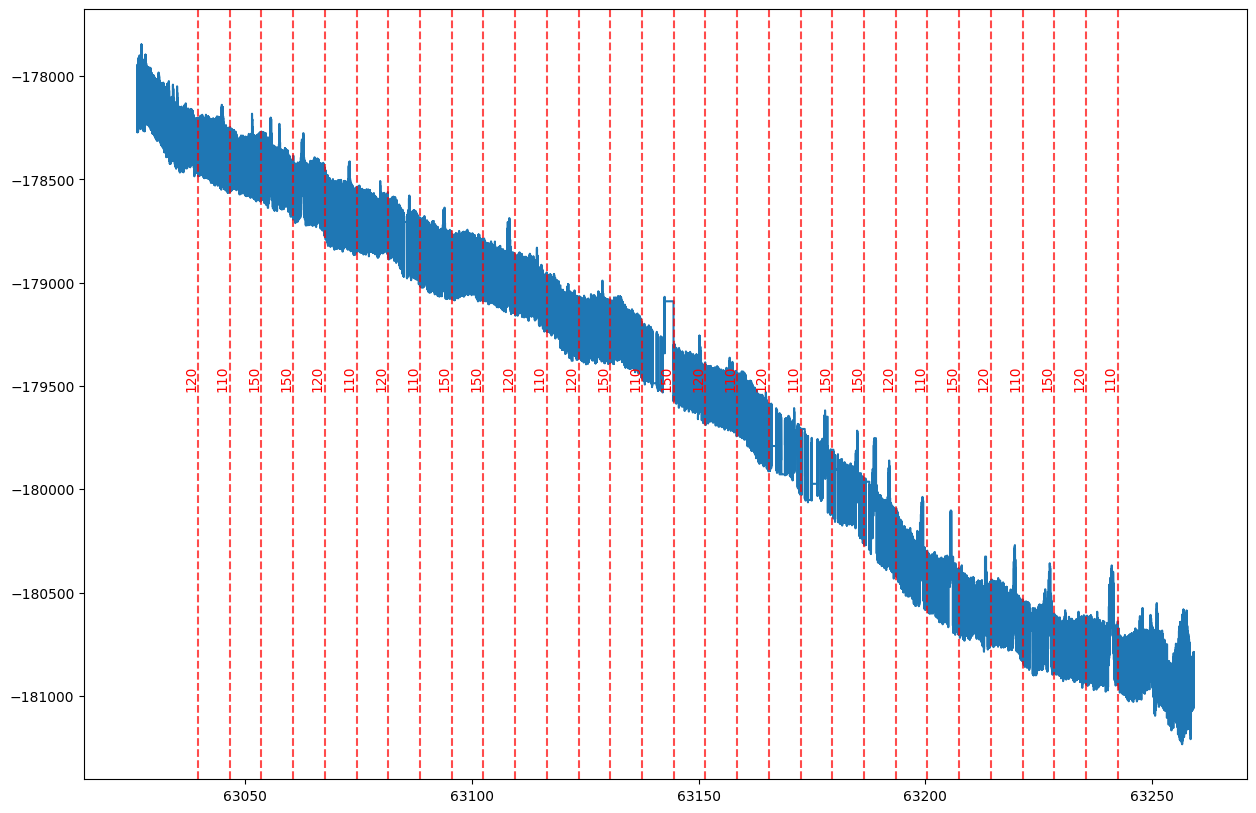

In [10]:
data_for_look = np.load('./train/train/'+data_time_series[2])
label_time = np.load('./train/train/'+label_time_stamps[2])
time = np.load('./train/train/'+data_time_stamps[2])
plt.figure(figsize=(15,10))
plt.plot(time,data_for_look[:, 0])
for j in range(len(label_time)):
    plt.axvline(x=label_time[j], color='r', linestyle='--', alpha=0.7)
    plt.text(label_time[j], np.mean(data_for_look[:, 0]), str(label[j, 0]),  # Use mean of current subplot's data
            color='r', verticalalignment='bottom', horizontalalignment='right', rotation=90)
plt.show()

### Save each label segment

In [11]:
tmp = np.load('./train/train/'+data_time_series[0])
tmp[:,:8].shape

(53714, 8)

In [14]:
import os
import numpy as np

# Make sure the required directories exist
os.makedirs('./class/110', exist_ok=True)
os.makedirs('./class/120', exist_ok=True)
os.makedirs('./class/150', exist_ok=True)

for num in range(0, len(data_time_series)):
    data = np.load('./train/train/'+data_time_series[num])
    time = np.load('./train/train/'+data_time_stamps[num])
    label_time = np.load('./train/train/'+label_time_stamps[num])
    label = np.load('./train/train/'+label_time_series[num])

    # Calculate the number of subplots needed
    num_subplots = len(label_time) - 1

    for i in range(8):
        for j in range(num_subplots):
            mask = (time >= label_time[j]) & (time < label_time[j+1])  # Select data between two timestamps
            sub_data = np.vstack([time[mask], data[mask, i]])

            if label[j,0] == 110:
                np.save('./class/110/'+str(num)+'_'+str(i)+'_'+str(j)+'_'+str(110)+'.npy', sub_data)
            elif label[j,0] == 120:
                np.save('./class/120/'+str(num)+'_'+str(i)+'_'+str(j)+'_'+str(120)+'.npy', sub_data)
            else:
                np.save('./class/150/'+str(num)+'_'+str(i)+'_'+str(j)+'_'+str(150)+'.npy', sub_data)

    # Save the last subgraph
    for i in range(8):
        mask = time >= label_time[-1]  # Select data from the last timestamp to the end
        sub_data = np.vstack([time[mask], data[mask, i]])

        if label[-1,0] == 110:
            np.save('./class/110/'+str(num)+'_'+str(i)+'_'+str(num_subplots)+'_'+str(110)+'.npy', sub_data)
        elif label[-1,0] == 120:
            np.save('./class/120/'+str(num)+'_'+str(i)+'_'+str(num_subplots)+'_'+str(120)+'.npy', sub_data)
        else:
            np.save('./class/150/'+str(num)+'_'+str(i)+'_'+str(num_subplots)+'_'+str(150)+'.npy', sub_data)


### Save 8 channel

In [15]:
import os
import numpy as np

# Make sure the required directories exist
os.makedirs('./merge_class/110', exist_ok=True)
os.makedirs('./merge_class/120', exist_ok=True)
os.makedirs('./merge_class/150', exist_ok=True)

for num in range(0, len(data_time_series)):
    data = np.load('./train/train/' + data_time_series[num])
    time = np.load('./train/train/' + data_time_stamps[num])
    label_time = np.load('./train/train/' + label_time_stamps[num])
    label = np.load('./train/train/' + label_time_series[num])

    # Calculate the number of subplots needed
    num_subplots = len(label_time) - 1

    for j in range(num_subplots):
        mask = (time >= label_time[j]) & (time < label_time[j + 1])
        lst = [time[mask]]
        for i in range(8):
            # Select data between two timestamps
            lst.append(data[mask, i])
        sub_data = np.array(lst)

        if label[j, 0] == 110:
            np.save('./merge_class/110/' + str(num) + '_' + str(j) + '_' + str(110) + '.npy', sub_data)
        elif label[j, 0] == 120:
            np.save('./merge_class/120/' + str(num) + '_' + str(j) + '_' + str(120) + '.npy', sub_data)
        else:
            np.save('./merge_class/150/' + str(num) + '_' + str(j) + '_' + str(150) + '.npy', sub_data)

    # Save the last subgraph
    mask = time >= label_time[-1]
    lst = [time[mask]]
    for i in range(8):
        # Select data from the last timestamp to the end
        lst.append(data[mask, i])
    sub_data = np.array(lst)

    if label[-1, 0] == 110:
        np.save('./merge_class/110/' + str(num) + '_' + str(num_subplots) + '_' + str(110) + '.npy', sub_data)
    elif label[-1, 0] == 120:
        np.save('./merge_class/120/' + str(num) + '_' + str(num_subplots) + '_' + str(120) + '.npy', sub_data)
    else:
        np.save('./merge_class/150/' + str(num) + '_' + str(num_subplots) + '_' + str(150) + '.npy', sub_data)


### Split Ratio and Merge

In [16]:
import os
import numpy as np

# Make sure the required directories exist
os.makedirs('./split_merge_class/110', exist_ok=True)
os.makedirs('./split_merge_class/120', exist_ok=True)
os.makedirs('./split_merge_class/150', exist_ok=True)

for num in range(0, len(data_time_series)):
    data = np.load('./train/train/' + data_time_series[num])
    time = np.load('./train/train/' + data_time_stamps[num])
    label_time = np.load('./train/train/' + label_time_stamps[num])
    label = np.load('./train/train/' + label_time_series[num])

    # Calculate the number of subplots needed
    num_subplots = len(label_time) - 1

    for j in range(num_subplots):
        mask = (time >= label_time[j]) & (time < label_time[j+1])
        mask = mask & (time - label_time[j] >= 2) & (time - label_time[j] < 5)
        lst = []
        for i in range(8):  # Change from range(9) to range(8)
            # Select data between two timestamps
            lst.append(data[mask, i])
        sub_data = np.array(lst)

        if label[j, 0] == 110:
            np.save('./split_merge_class/110/' + str(num) + '_' + str(j) + '_110.npy', sub_data)
        elif label[j, 0] == 120:
            np.save('./split_merge_class/120/' + str(num) + '_' + str(j) + '_120.npy', sub_data)
        else:
            np.save('./split_merge_class/150/' + str(num) + '_' + str(j) + '_150.npy', sub_data)

    # Save the last subgraph
    mask = time >= label_time[-1]
    mask = mask & (time - label_time[-1] >= 2) & (time - label_time[-1] < 5)
    lst = []
    for i in range(8):  # Change from range(9) to range(8)
        # Select data from the last timestamp to the end
        lst.append(data[mask, i])
    sub_data = np.array(lst)

    if label[-1, 0] == 110:
        np.save('./split_merge_class/110/' + str(num) + '_' + str(num_subplots) + '_110.npy', sub_data)
    elif label[-1, 0] == 120:
        np.save('./split_merge_class/120/' + str(num) + '_' + str(num_subplots) + '_120.npy', sub_data)
    else:
        np.save('./split_merge_class/150/' + str(num) + '_' + str(num_subplots) + '_150.npy', sub_data)


### Clean and Split

In [17]:
tmp = np.load('./split_merge_class/110/0_5_110.npy')
tmp.shape

(8, 747)

### plot only one label segment

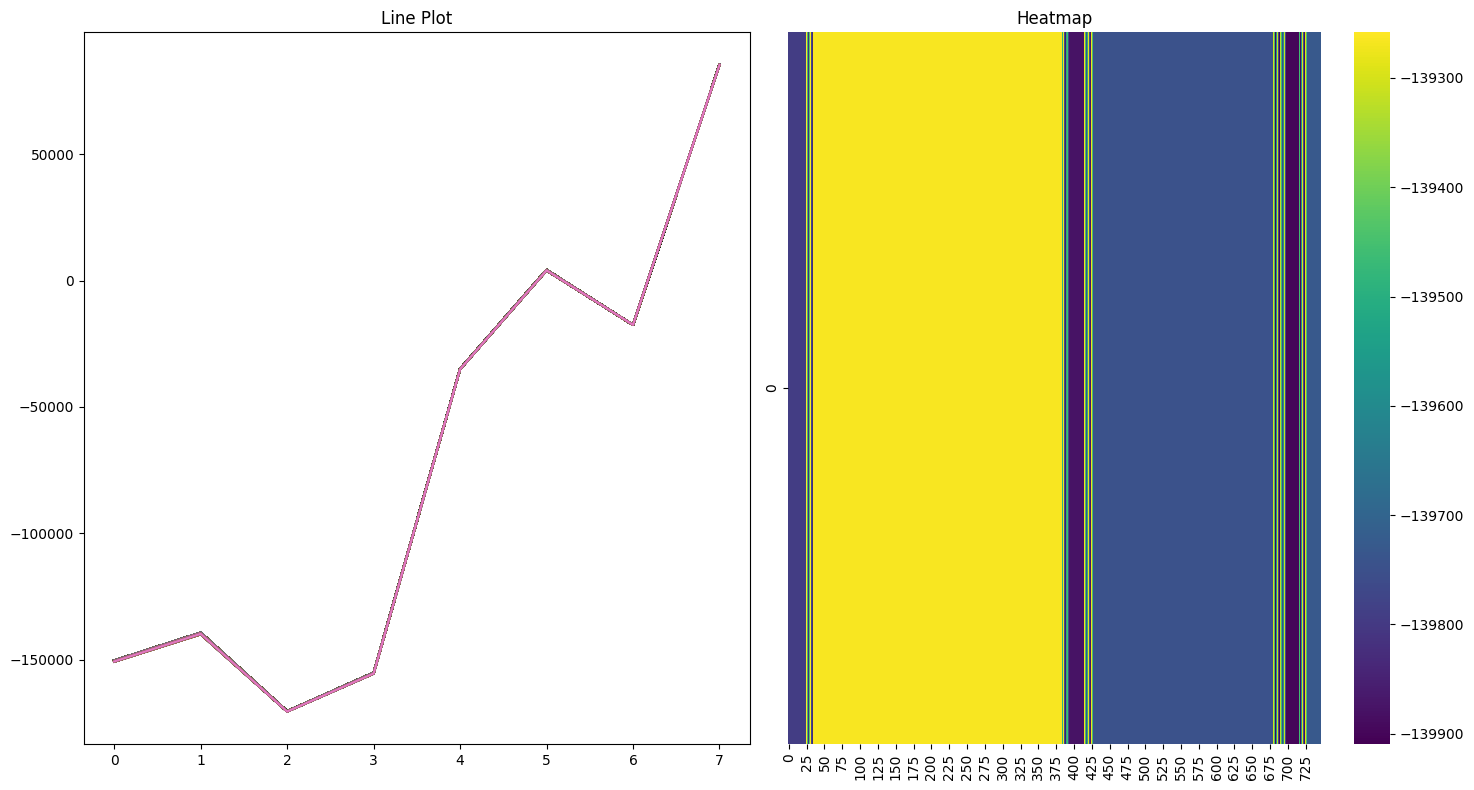

In [18]:
last_data = np.load(r'split_merge_class\110\0_1_110.npy')

plt.figure(figsize=(15, 8))

# Plotting the graph
plt.subplot(1, 2, 1)
plt.plot(np.array(range(len(last_data[:]))), last_data)
plt.title('Line Plot')

# Plotting the heatmap
plt.subplot(1, 2, 2)
sns.heatmap(last_data[1].reshape(-1, 1).T, cmap='viridis')
plt.title('Heatmap')

plt.tight_layout()
plt.show()

### Count All label file

In [19]:
num_110 = os.listdir('./class/110/')
num_120 = os.listdir('./class/120/')
num_150 = os.listdir('./class/150/')
len(num_110), len(num_120), len(num_150), len(num_110)+len(num_120)+len(num_150)

(15344, 15336, 15352, 46032)

In [20]:
num_merge_110 = os.listdir('./merge_class/110/')
num_merge_120 = os.listdir('./merge_class/120/')
num_merge_150 = os.listdir('./merge_class/150/')
len(num_merge_110), len(num_merge_120), len(num_merge_150), len(num_merge_110)+len(num_merge_120)+len(num_merge_150)

(1918, 1917, 1919, 5754)

In [21]:
num_split_merge_110 = os.listdir('./split_merge_class/110/')
num_split_merge_120 = os.listdir('./split_merge_class/120/')
num_split_merge_150 = os.listdir('./split_merge_class/150/')
len(num_split_merge_110), len(num_split_merge_120), len(num_split_merge_150), len(num_split_merge_110)+len(num_split_merge_120)+len(num_split_merge_150)

(1918, 1917, 1919, 5754)

### Find Ratio

In [22]:
tmp = np.load('./class/110/0_0_1_110.npy')
#Declare length of segment
total = tmp.shape[1] #1741

#Declare Ratio that you want to split
ratio = [2, 3, 2] # 2:3:2

#Calculate total ratio
total_ratio = sum(ratio) #7

#Calculate length of each ratio
each_ratio = [int(i*(total/total_ratio)) for i in ratio] #[497, 746, 497]
#lst[:497], lst[497:1243], lst[1243:1741]

In [23]:
len(tmp[0][497:1243])

746